In [79]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2

In [80]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [81]:
ls

'-'

## R

In [82]:
#rdir = '/workspace'
rdir = '../'
dat_files = natsort(glob2.glob(rdir + '/ext_results/results/R/**/*.dat'))
len(dat_files)
#dat_files

8

In [83]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [92]:
data = []
realtime = []
gooddata = []
col = 'subzone'

for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        realtime.append(df['realtime'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


dict_files = natsort(glob2.glob(rdir + '/temp_results/results/R/**/md.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
#newdf = newdf.join(params)

In [93]:
[i + 1 for i in gooddata]

[1, 2, 3, 4, 5, 6, 7, 8]

In [94]:
import numpy as np
params = []
counter = 1
for a in [128, 160, 192, 256]:
    for b in ["Q1/dQ0", "Q2/DPC1"]:
        params.append([a,b, counter])
        counter +=1
params = np.array(params)[gooddata]
#params = np.array(params)

print(len(params))
#params[25]

8


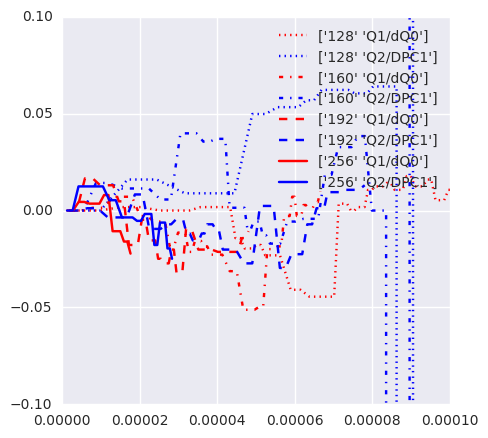

In [96]:
fig, ax = plt.subplots(figsize=(5,5))



for i in range(0, realtime.shape[0]):
    
        #print(i, gooddata[i])
        if params[i][0] == '128':
            ls = ':'
        if params[i][0] == '160':
            ls = '-.'
        elif params[i][0] == '192':
            ls = '--'
        elif params[i][0] == '256':
            ls = '-'
        if params[i][1] == 'Q1/dQ0':
            c = 'r'
        else:
            c   = 'b'
            
        ax.plot(realtime[i], data[i], c=c, linestyle=ls, label=str((params[i][[0,1]])) )

ax.set_xlim(0., 0.0001)
ax.set_ylim(-0.1, 0.1)
ax.legend()


Note the resoltion for the q2 models is half the recoded. 256 => 128.  


    

In [99]:
data.max()

ValueError: Can only compare identically-labeled Series objects

In [105]:
for d in data:
    print(d.min())

-0.06403125
-9999999.0
-0.051225
-9999999.0
-0.032015625
-0.0296440972222
-0.0222330729167
-0.0249010416667
